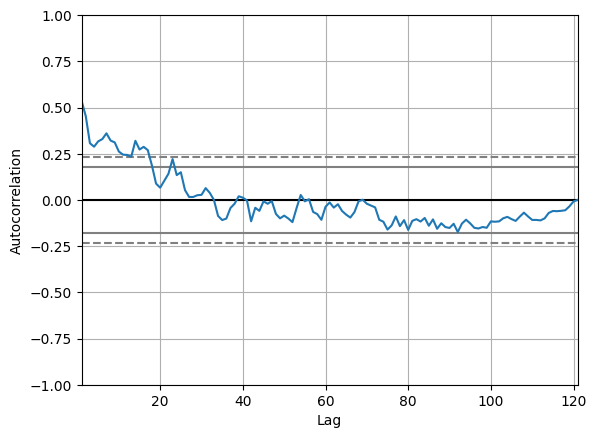

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


# Load the CSV file
file_path = "yield_data/tas_timeseries_monthly_cru_1901-2021_DEU.csv"
df = pd.read_csv(file_path)

# Convert 'Year' column to integers
df['Year'] = df['Year'].astype(int)

# Convert all other columns to float
df = df.astype({'Jan': float, 'Feb': float, 'Mar': float, 'Apr': float, 'May': float, 'Jun': float,
                'Jul': float, 'Aug': float, 'Sep': float, 'Oct': float, 'Nov': float, 'Dec': float})

# Set 'Year' as the index
df.set_index('Year', inplace=True)

# Plot autocorrelation plot 
#autocorrelation_plot(df)
#plt.show()

# Calculate the mean temperature over the rows for each year
df['Mean_Temperature'] = df.mean(axis=1)

df_temp = df['Mean_Temperature']
# Plot autocorrelation plot
autocorrelation_plot(df['Mean_Temperature'])
plt.show()

# Define the ARIMA model parameters
order = (15, 1, 0)  # (p, d, q)
# Plot shows that approx. 37 have a positive correlation and that approx. 15 have a very strong positive correlation -> Check values between 5 to 15 to find optimum of first value. 

### first tests

                               SARIMAX Results                                
Dep. Variable:       Mean_Temperature   No. Observations:                  121
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -116.702
Date:                Sun, 13 Aug 2023   AIC                            239.405
Time:                        07:12:07   BIC                            247.717
Sample:                             0   HQIC                           242.780
                                - 121                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1664      0.108      1.540      0.124      -0.045       0.378
ma.L1         -0.8685      0.060    -14.482      0.000      -0.986      -0.751
sigma2         0.4202      0.070      5.994      0.0

c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


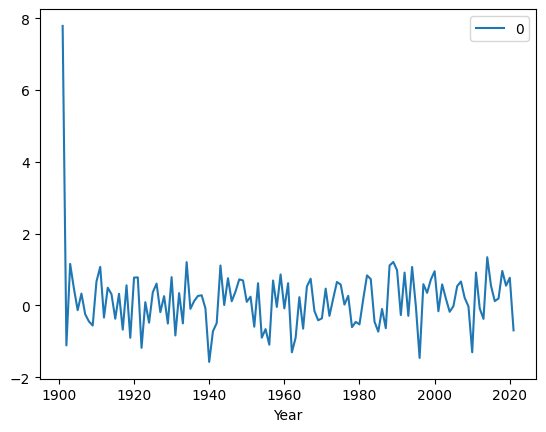

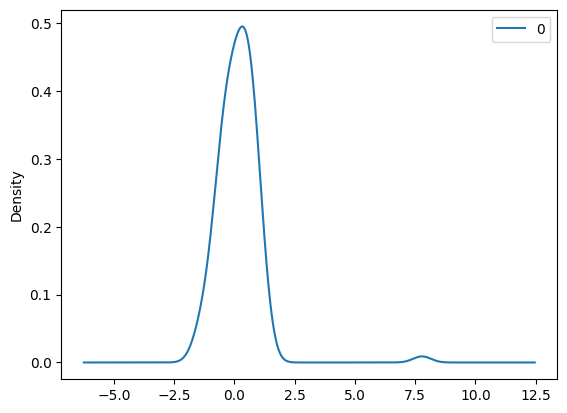

                0
count  121.000000
mean     0.162980
std      0.956238
min     -1.573412
25%     -0.374695
50%      0.188884
75%      0.619973
max      7.786667


In [40]:
# fit model
model = ARIMA(df['Mean_Temperature'],order=(1,1,1), 
                            enforce_stationarity=False,
                            enforce_invertibility=False)
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    Jan   No. Observations:                  121
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -275.148
Date:                Sun, 13 Aug 2023   AIC                            556.296
Time:                        07:08:00   BIC                            564.608
Sample:                    01-01-1901   HQIC                           559.671
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0280      0.085      0.328      0.743      -0.139       0.195
ma.L1         -0.9486      0.041    -23.000      0.000      -1.029      -0.868
sigma2         6.1202      0.776      7.886      0.0

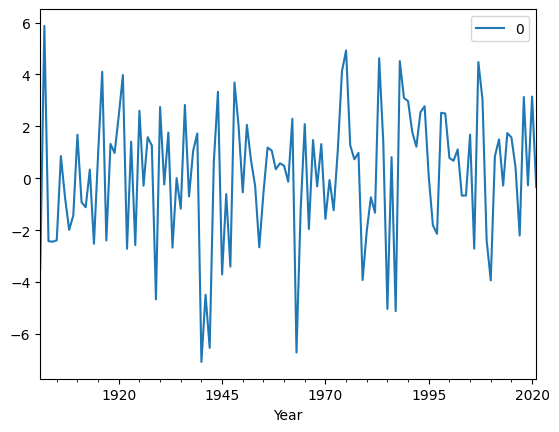

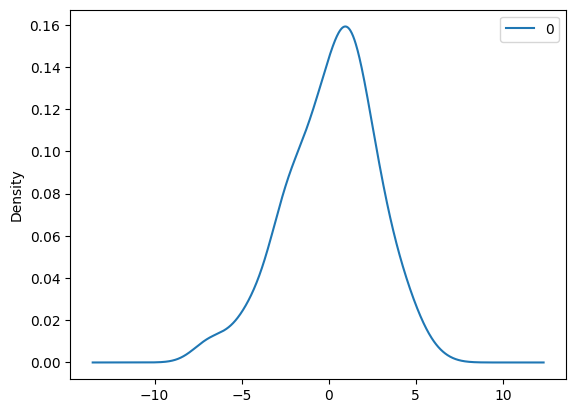

                0
count  121.000000
mean     0.123908
std      2.548345
min     -7.076774
25%     -1.433937
50%      0.576311
75%      1.726966
max      5.869392
                               SARIMAX Results                                
Dep. Variable:                    Feb   No. Observations:                  121
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -279.911
Date:                Sun, 13 Aug 2023   AIC                            565.823
Time:                        07:08:00   BIC                            574.135
Sample:                    01-01-1901   HQIC                           569.198
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0045      0.108      0.042     

c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


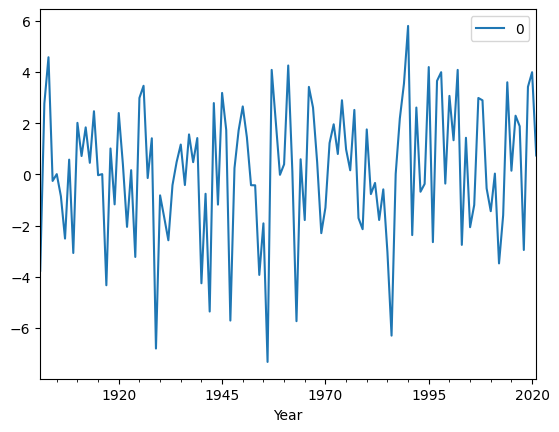

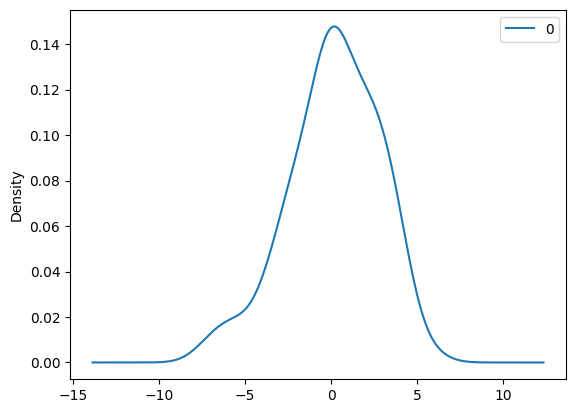

                0
count  121.000000
mean     0.155971
std      2.624283
min     -7.322653
25%     -1.435320
50%      0.166457
75%      2.038653
max      5.800405
                               SARIMAX Results                                
Dep. Variable:                    Mar   No. Observations:                  121
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -242.941
Date:                Sun, 13 Aug 2023   AIC                            491.882
Time:                        07:08:00   BIC                            500.194
Sample:                    01-01-1901   HQIC                           495.257
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0861      0.091     -0.943     

c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


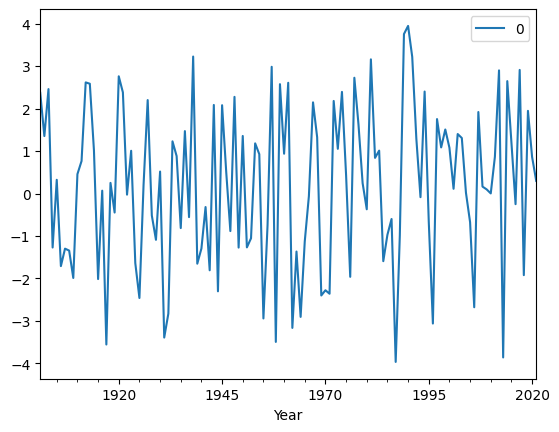

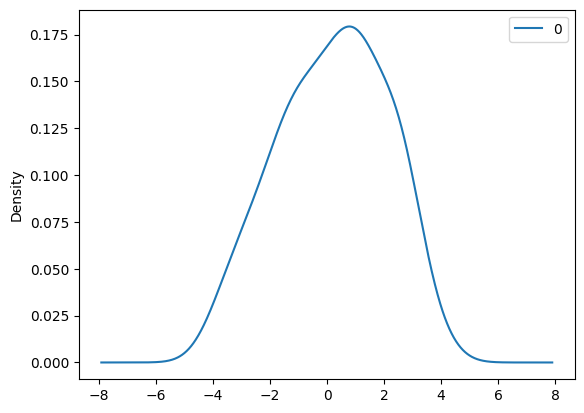

                0
count  121.000000
mean     0.182920
std      1.895950
min     -3.963578
25%     -1.271075
50%      0.249764
75%      1.506769
max      3.944211
                               SARIMAX Results                                
Dep. Variable:                    Apr   No. Observations:                  121
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -213.269
Date:                Sun, 13 Aug 2023   AIC                            432.539
Time:                        07:08:01   BIC                            440.851
Sample:                    01-01-1901   HQIC                           435.914
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2486      0.123     -2.026     

c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


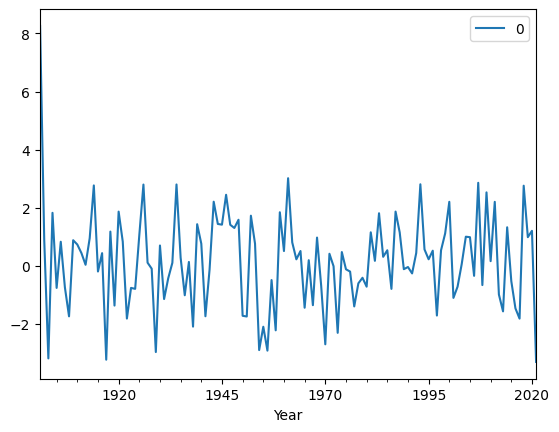

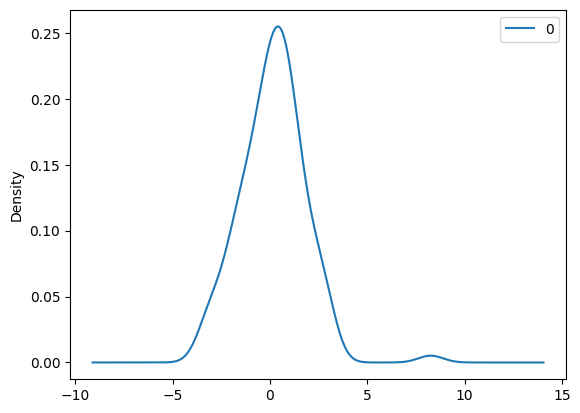

                0
count  121.000000
mean     0.169983
std      1.663662
min     -3.315989
25%     -0.766091
50%      0.219000
75%      1.111998
max      8.260000
                               SARIMAX Results                                
Dep. Variable:                    May   No. Observations:                  121
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -207.406
Date:                Sun, 13 Aug 2023   AIC                            420.812
Time:                        07:08:01   BIC                            429.124
Sample:                    01-01-1901   HQIC                           424.187
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0419      0.100      0.420     

c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


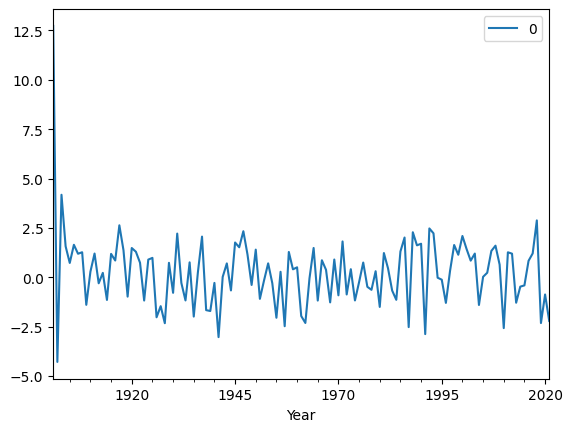

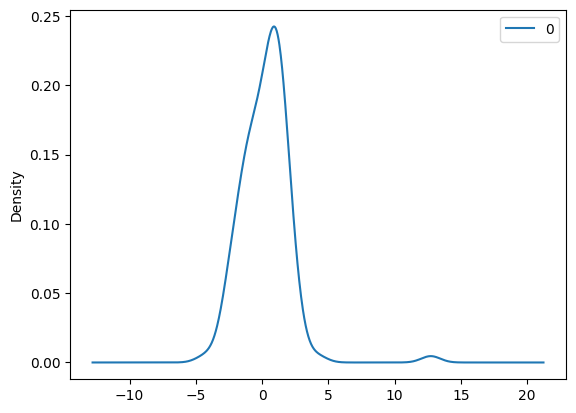

                0
count  121.000000
mean     0.252855
std      1.874969
min     -4.287006
25%     -0.980003
50%      0.378074
75%      1.268082
max     12.730000
                               SARIMAX Results                                
Dep. Variable:                    Jun   No. Observations:                  121
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -192.332
Date:                Sun, 13 Aug 2023   AIC                            390.665
Time:                        07:08:02   BIC                            398.977
Sample:                    01-01-1901   HQIC                           394.040
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2770      0.098     -2.813     

c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


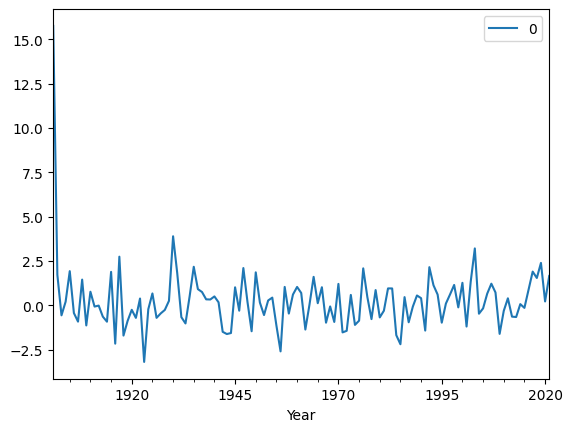

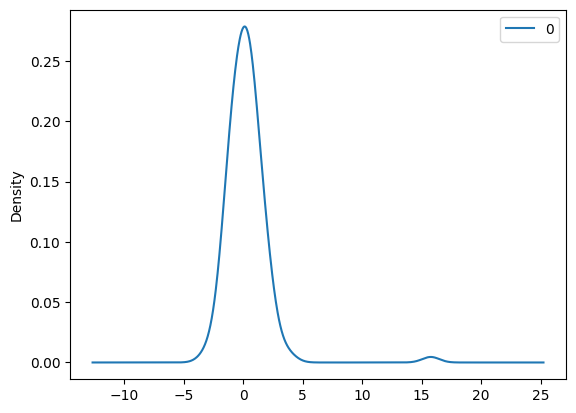

                0
count  121.000000
mean     0.264418
std      1.877385
min     -3.195674
25%     -0.709173
50%      0.166594
75%      0.949629
max     15.760000
                               SARIMAX Results                                
Dep. Variable:                    Jul   No. Observations:                  121
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -207.515
Date:                Sun, 13 Aug 2023   AIC                            421.030
Time:                        07:08:02   BIC                            429.343
Sample:                    01-01-1901   HQIC                           424.405
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0446      0.099     -0.449     

c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


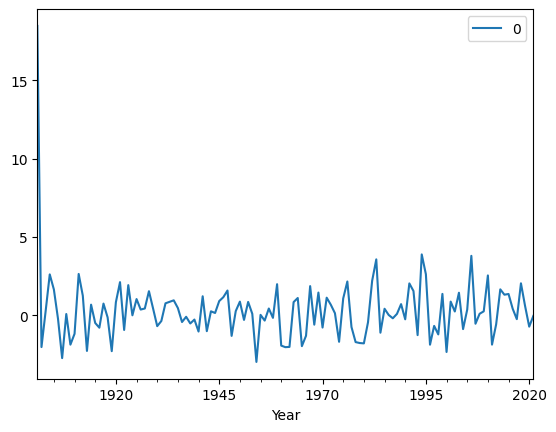

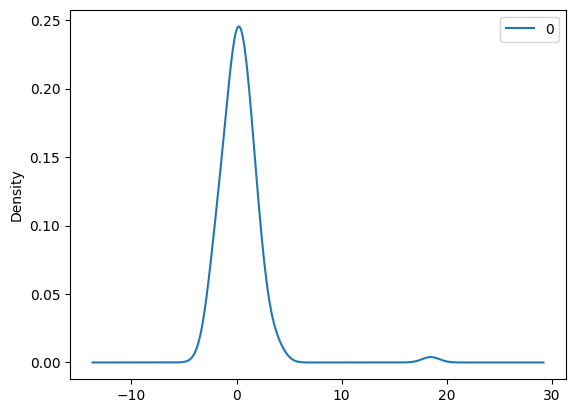

                0
count  121.000000
mean     0.319461
std      2.174399
min     -2.976490
25%     -0.724973
50%      0.146972
75%      1.103880
max     18.470000
                               SARIMAX Results                                
Dep. Variable:                    Aug   No. Observations:                  121
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -188.465
Date:                Sun, 13 Aug 2023   AIC                            382.931
Time:                        07:08:02   BIC                            391.243
Sample:                    01-01-1901   HQIC                           386.306
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0736      0.101      0.729     

c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


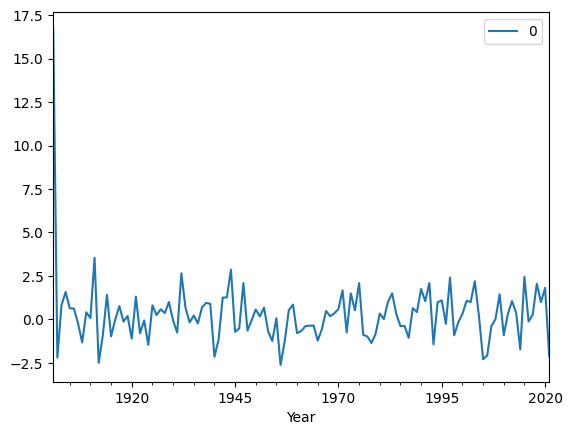

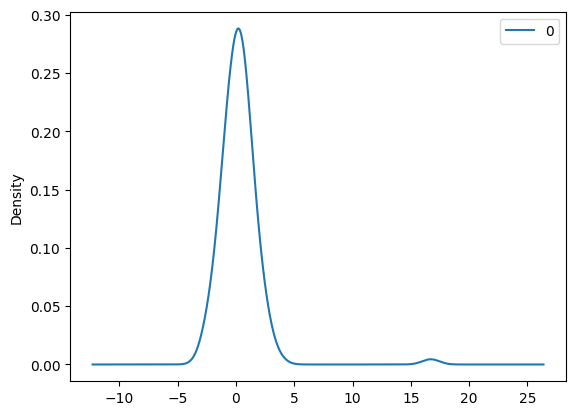

                0
count  121.000000
mean     0.296332
std      1.920653
min     -2.626980
25%     -0.694198
50%      0.218211
75%      0.980623
max     16.710000
                               SARIMAX Results                                
Dep. Variable:                    Sep   No. Observations:                  121
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -203.627
Date:                Sun, 13 Aug 2023   AIC                            413.254
Time:                        07:08:03   BIC                            421.566
Sample:                    01-01-1901   HQIC                           416.629
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1755      0.120     -1.461     

c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


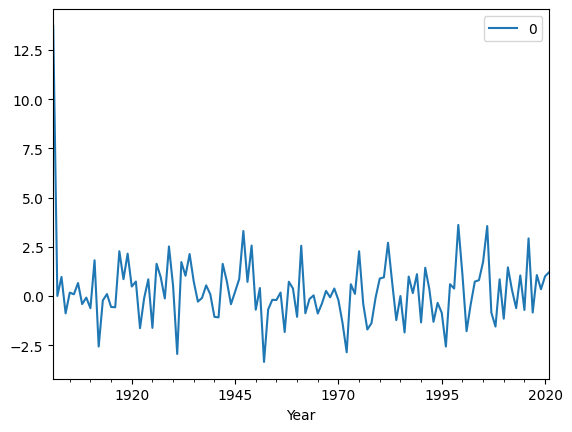

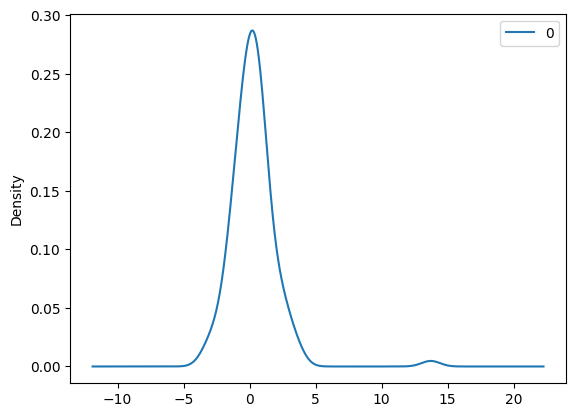

                0
count  121.000000
mean     0.294948
std      1.815576
min     -3.349435
25%     -0.618185
50%      0.172696
75%      0.951338
max     13.730000
                               SARIMAX Results                                
Dep. Variable:                    Oct   No. Observations:                  121
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -212.052
Date:                Sun, 13 Aug 2023   AIC                            430.104
Time:                        07:08:03   BIC                            438.416
Sample:                    01-01-1901   HQIC                           433.479
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1500      0.088      1.705     

c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


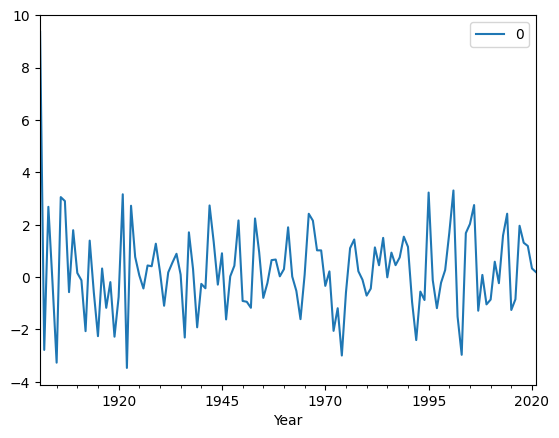

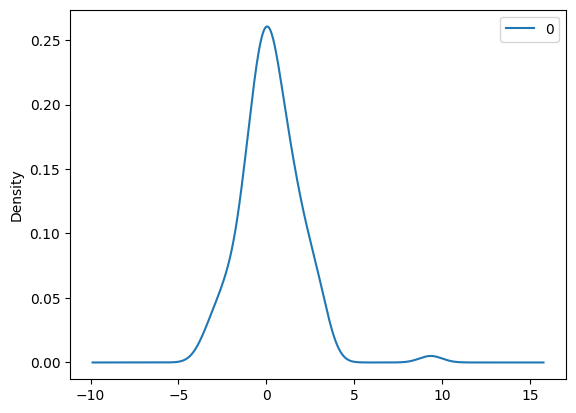

                0
count  121.000000
mean     0.263888
std      1.703582
min     -3.469429
25%     -0.761472
50%      0.177428
75%      1.186161
max      9.360000
                               SARIMAX Results                                
Dep. Variable:                    Nov   No. Observations:                  121
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -216.862
Date:                Sun, 13 Aug 2023   AIC                            439.724
Time:                        07:08:03   BIC                            448.036
Sample:                    01-01-1901   HQIC                           443.099
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0796      0.118     -0.673     

c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


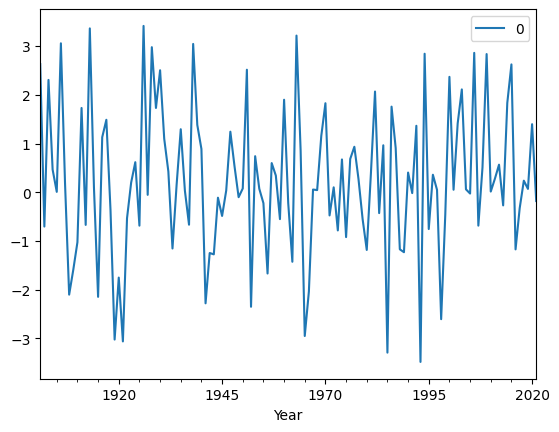

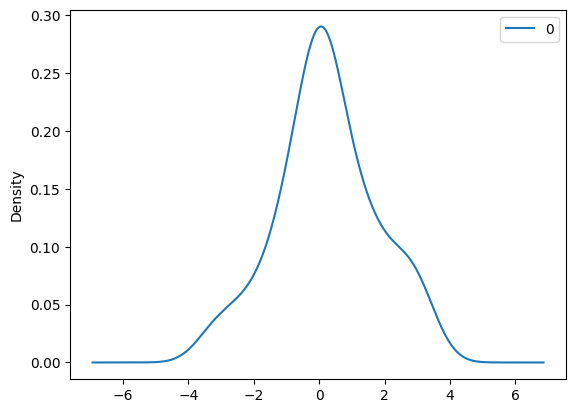

                0
count  121.000000
mean     0.230236
std      1.524366
min     -3.484590
25%     -0.667309
50%      0.076151
75%      1.156846
max      3.414138
                               SARIMAX Results                                
Dep. Variable:                    Dec   No. Observations:                  121
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -247.906
Date:                Sun, 13 Aug 2023   AIC                            501.811
Time:                        07:08:04   BIC                            510.123
Sample:                    01-01-1901   HQIC                           505.186
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1146      0.102      1.118     

c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\julia\Desktop\Development\AI\CropVest\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


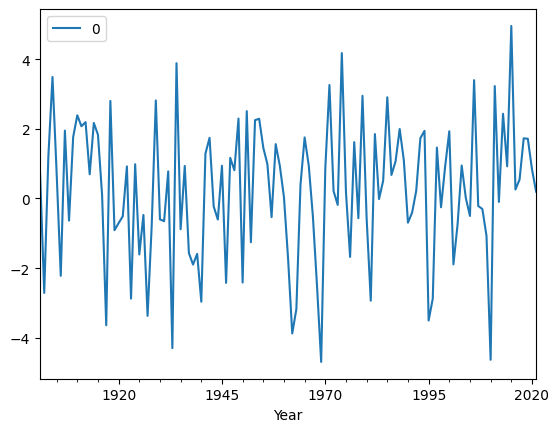

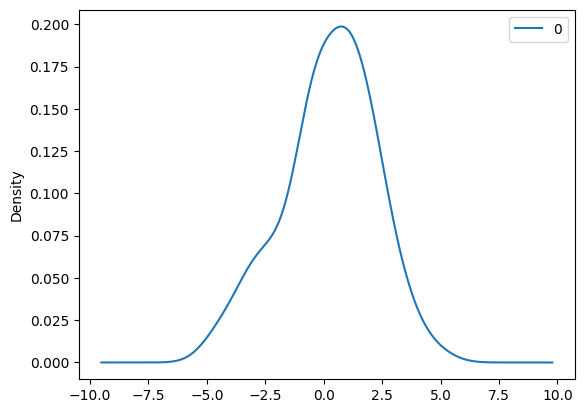

                0
count  121.000000
mean     0.235664
std      1.969115
min     -4.691992
25%     -0.706170
50%      0.509959
75%      1.727626
max      4.954120


In [36]:
series = pd.read_csv(file_path, header=0, index_col=0, parse_dates=True)
df = series
# Loop through each month (excluding the first index)
for month in df.columns:
    # fit model
    model = ARIMA(df[month],order=(1,1,1), 
                            enforce_stationarity=False,
                            enforce_invertibility=False)
    model_fit = model.fit()
    # summary of fit model
    print(model_fit.summary())
    # line plot of residuals
    residuals = pd.DataFrame(model_fit.resid)
    residuals.plot()
    plt.show()
    # density plot of residuals
    residuals.plot(kind='kde')
    plt.show()
    # summary stats of residuals
    print(residuals.describe())

In [ ]:

# Initialize lists to store predicted values and actual values
predicted_values = []
actual_values = []

# Loop through each month (excluding the first index)
for month in df.columns:
        # Reset index to numerical values
        df_reset = df.reset_index()

        # Fit the ARIMA model
        model = ARIMA(df_reset[month], order=order)
        model_fit = model.fit()
        # summary of fit model
        print(model_fit.summary())

        # Predict the temperature for the year 2021
        forecast = model_fit.forecast(steps=1)  # Forecast for the entire year 2022
        # steps 12

        # Append the predicted value and actual value
        predicted_values.append(forecast[0])
        actual_values.append(df.loc[1902, month])  
        # Append the predicted values for the year 2021
        #predicted_values.extend(forecast)
        
        # Append the actual values for the year 2021
        #actual_values.extend(df.loc[2021, month] for _ in range(12))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)
print("Mean Squared Error:", mse)

print()
# Print the forecast results for the year 2022
for month, predicted, actual in zip(df.columns, predicted_values, actual_values):
    print(f"Month: {month}, Predicted: {predicted:.2f}, Actual: {actual:.2f}")

# List of month names for x-axis ticks
month_names = df.columns.tolist()

# Plot the predicted values and actual values for the year 2022
plt.plot(month_names, predicted_values, label='Predicted', marker='o')
plt.plot(month_names, actual_values, label='Actual', marker='x')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Temperature Forecasting for the Year 2022')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### prediction

predicted=8.212617, expected=7.747500
predicted=8.140260, expected=8.360000
predicted=8.250534, expected=9.145000
predicted=8.706143, expected=9.280833
predicted=8.867903, expected=8.212500
predicted=8.370998, expected=7.699167
predicted=7.911678, expected=8.150000
predicted=8.322410, expected=7.676667
predicted=8.356582, expected=9.260000
predicted=8.611547, expected=9.768333
predicted=9.185178, expected=9.784167
predicted=9.142200, expected=8.665000
predicted=8.627798, expected=9.626667
predicted=8.921019, expected=8.702500
predicted=9.362787, expected=9.872500
predicted=9.456451, expected=9.119167
predicted=9.580282, expected=7.545833
predicted=8.399840, expected=9.146667
predicted=8.679420, expected=9.249167
predicted=9.402379, expected=9.685000
predicted=9.460039, expected=10.083333
predicted=9.408288, expected=9.159167
predicted=9.135658, expected=9.732500
predicted=9.372121, expected=9.507500
predicted=9.664954, expected=9.129167
predicted=9.527273, expected=9.201667
predicted=9

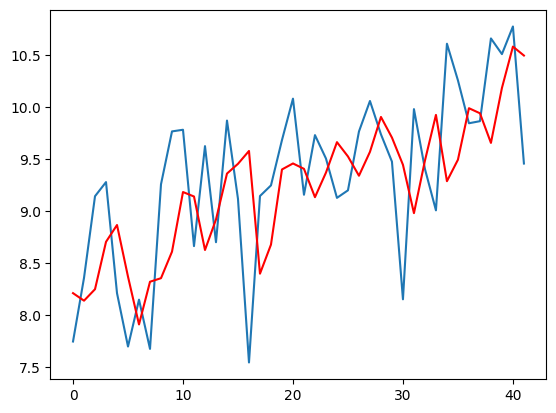

In [6]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

df_temp = df['Mean_Temperature']
# split into train and test sets
X = df_temp.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5, 2, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [4]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error


# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
	
df_temp = df['Mean_Temperature']


# split into train and test sets
X = df_temp.values

# evaluate parameters
p_values = [5,10,15,20]
d_values = range(1, 3)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(X, p_values, d_values, q_values)
# Best ARIMA(5, 2, 1) MSE=0.520

ARIMA(5, 1, 0) MSE=0.522
ARIMA(5, 1, 1) MSE=0.578
ARIMA(5, 2, 0) MSE=0.807
ARIMA(5, 2, 1) MSE=0.520
ARIMA(10, 1, 0) MSE=0.595
ARIMA(10, 1, 1) MSE=0.668
ARIMA(10, 2, 0) MSE=0.727
ARIMA(10, 2, 1) MSE=0.576
ARIMA(15, 1, 0) MSE=0.706
ARIMA(15, 1, 1) MSE=0.717
ARIMA(15, 2, 0) MSE=0.761
ARIMA(15, 2, 1) MSE=0.666
ARIMA(20, 1, 0) MSE=0.694
ARIMA(20, 1, 1) MSE=0.736
ARIMA(20, 2, 0) MSE=0.666
ARIMA(20, 2, 1) MSE=0.663
Best ARIMA(5, 2, 1) MSE=0.520


In [5]:
df_temp = df['Mean_Temperature']
# split into train and test sets
X = df_temp.values

# evaluate parameters
p_values = [5,7,9]
d_values = range(1, 3)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(X, p_values, d_values, q_values)
# Best ARIMA(5, 2, 1) MSE=0.520

ARIMA(5, 1, 0) MSE=0.522
ARIMA(5, 1, 1) MSE=0.578
ARIMA(5, 2, 0) MSE=0.807
ARIMA(5, 2, 1) MSE=0.520
ARIMA(7, 1, 0) MSE=0.543
ARIMA(7, 1, 1) MSE=0.608
ARIMA(7, 2, 0) MSE=0.766
ARIMA(7, 2, 1) MSE=0.532
ARIMA(9, 1, 0) MSE=0.587
ARIMA(9, 1, 1) MSE=0.632
ARIMA(9, 2, 0) MSE=0.728
ARIMA(9, 2, 1) MSE=0.568
Best ARIMA(5, 2, 1) MSE=0.520
